In [1]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np

np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

Using TensorFlow backend.


In [2]:
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [3]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  




# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))

#建立 Hidden layer
model.add(Flatten(name='flatten_1'))
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))

#輸出層
model.add(Dense(10, activation='softmax', name='dense_2'))

model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [4]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train4D_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 26s 536us/step - loss: 0.4694 - accuracy: 0.8532 - val_loss: 0.0987 - val_accuracy: 0.9699
Epoch 2/10
48000/48000 [==============================] - 29s 613us/step - loss: 0.1333 - accuracy: 0.9602 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 3/10
48000/48000 [==============================] - 28s 592us/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 4/10
48000/48000 [==============================] - 28s 582us/step - loss: 0.0812 - accuracy: 0.9758 - val_loss: 0.0486 - val_accuracy: 0.9858
Epoch 5/10
48000/48000 [==============================] - 28s 577us/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0432 - val_accuracy: 0.9874
Epoch 6/10
48000/48000 [==============================] - 28s 580us/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0413 - val_accuracy: 0.9881
Epoch 7/10
48000/48000 [==============================] 

In [5]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

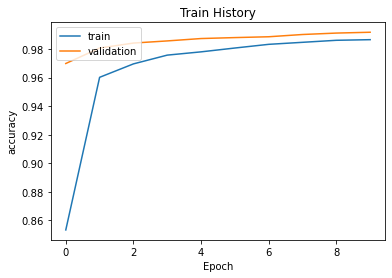

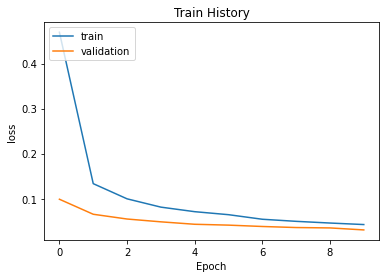

In [6]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')

In [7]:
import glob as gb
import cv2

In [10]:
# -*- coding: UTF-8 -*-
img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
## 阈值分割
ret,thresh = cv2.threshold(gray,200,255,1)

## 對二值圖像執行膨脹操作
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))     
dilated = cv2.dilate(thresh,kernel)

## 輪廓提取，cv2.RETR_TREE表示建立層級結構
_ ,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

## 提取小方格，其父輪廓都为0號輪廓
boxes = []
for i in range(len(hierarchy[0])):
    if hierarchy[0][i][3] == 0:
        boxes.append(hierarchy[0][i])

## 提取數字，其父輪廓都存在子輪廓        
height,width = img.shape[:2]
box_h = height/9
box_w = width/9
number_boxes = []
soduko = np.zeros((9, 9),np.int32)

for j in range(len(boxes)):
    if boxes[j][2] != -1:
        #number_boxes.append(boxes[j])
        x,y,w,h = cv2.boundingRect(contours[boxes[j][2]])
        number_boxes.append([x,y,w,h])
        #img = cv2.rectangle(img,(x-1,y-1),(x+w+1,y+h+1),(0,0,255),2)
        #img = cv2.drawContours(img, contours, boxes[j][2], (0,255,0), 1)
        ## 提取數字預處理
        number_roi = gray[y:y+h, x:x+w]
        
        ## 統一大小
        resized_roi=cv2.resize(number_roi,(28,28))
        thresh1 = cv2.adaptiveThreshold(resized_roi,255,1,1,11,2) 
        
        ## 歸一化像素值
        normalized_roi = thresh1/255.  
        ## resize
        resize = normalized_roi.reshape(1,28,28,1).astype("float32")
        
        prediction = model.predict_classes(resize)  # Making prediction and save result to prediction  

  
        ## 識別结果展示
        cv2.putText(img,str(prediction),(x+w+1,y+h-20), 3, 2., (255, 0, 0), 2, cv2.LINE_AA)
        
        ## 求在矩陣中的位置
        soduko[int(y/box_h)][int(x/box_w)] = prediction
               
    

print("\n生成的數獨\n")
print(soduko)





生成的數獨

[[2 5 0 0 5 0 0 3 0]
 [4 0 0 0 3 0 2 0 0]
 [0 3 2 0 0 0 4 0 5]
 [0 0 0 0 0 3 0 0 0]
 [0 0 3 0 5 0 3 0 0]
 [0 0 0 2 0 0 0 0 0]
 [5 0 3 0 0 0 3 7 0]
 [0 0 2 0 4 0 0 0 5]
 [0 2 0 0 3 0 0 3 3]]


### 先前已自行抓取 印刷體數字集 0~9個十張 以knn方式進行訓練
### 想嘗試更大資料及 MNIST的手寫資料集 想嘗試看看是否可行 
### 發現準確率極低 不確定是輸入資料錯誤 或是手寫與印刷特徵差異過大